In [15]:
#https://www.kaggle.com/yersever/500-person-gender-height-weight-bodymassindex

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
Gender    500 non-null object
Height    500 non-null int64
Weight    500 non-null int64
Index     500 non-null int64
dtypes: int64(3), object(1)
memory usage: 15.7+ KB


In [5]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [6]:
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [8]:
df.corr()

,Height,Weight,Index
Height,1.000000,0.000446,-0.422223
Weight,0.000446,1.000000,0.804569
Index,-0.422223,0.804569,1.000000


In [9]:
df.shape

(500, 4)

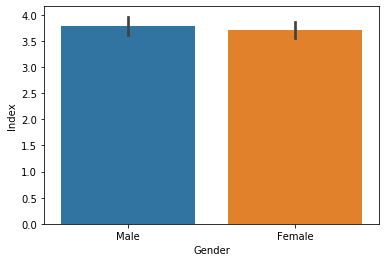

In [11]:
sns.barplot(data = df, y = 'Index',x= 'Gender')

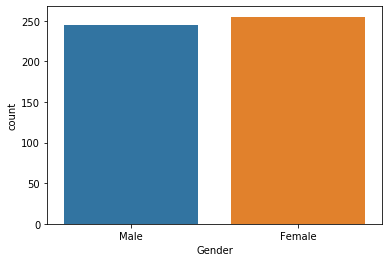

In [14]:
sns.countplot(data = df, x = 'Gender')

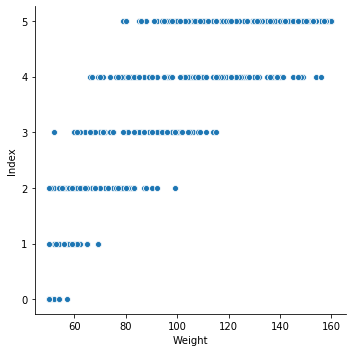

In [18]:
sns.relplot(data = df, x = 'Weight', y = 'Index')

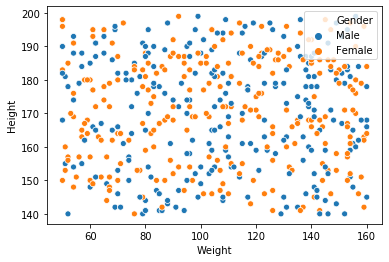

In [21]:
sns.scatterplot(data = df, x= 'Weight',y = 'Height',hue= 'Gender')

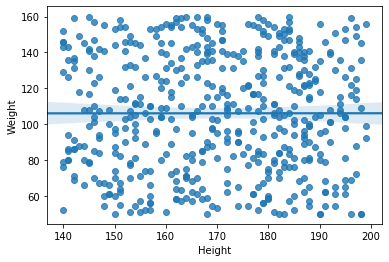

In [25]:
sns.regplot(data = df, x = 'Height', y = 'Weight')

In [26]:
df['Gender'] = df['Gender'].map({'Male' : 1, 'Female':0})

In [28]:
df.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [33]:
y = df['Index']
x = df.drop(['Index'], axis = 1)


In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(x,y)
pred = lr.predict(x)
score = lr.score(x,y)
score

0.8260932372756102

In [53]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,x,y,cv=4)

score


array([0.82691109, 0.7972458 , 0.82784785, 0.8364314 ])